In [3]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

import numpy as np
import pandas as pd
import cv2
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.models import Sequential  
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Flatten

Using TensorFlow backend.


In [4]:
# 填写lable.csv文件的路径
labelPath = r"data/data"

# 填写训练集、测试集文件夹的路径
trainPath = r"data/train"
testPath = r"data/test"

In [5]:
def resizedFile(path):
    files = os.listdir(path)
    resized = []

    for i, file in enumerate(files):
#         linux系统注意修改/
        image = cv2.imread(path + "\\" + file)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized.append(gray)

    resized = np.vstack(resized)
    resized.resize((len(files), 28, 28))
    
    return resized

x_train_image = resizedFile(trainPath)
x_test_image = resizedFile(testPath)

def get_label(path, allLabel):
    
    files = os.listdir(path)
    df = pd.read_csv(allLabel)

    label = np.array([])

    names = df['name'].values
    labels = df['label'].values

    for file in files:
        for i, each in enumerate(names):
            if file == each or file.replace("_90", "") == each or file.replace("_180", "") == each or file.replace("_270", "") == each :
                label = np.append(label, labels[i])

    print(label.shape)
    return label

y_train_label = get_label(trainPath, labelPath)
y_test_label = get_label(testPath, labelPath)

print(y_train_label.shape)
print(y_test_label.shape)

In [77]:
# # 使用mnist测试是否能运行
# (x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()  # 下载读取mnist数据

11493376/11490434 [==============================] - 179s 16us/step


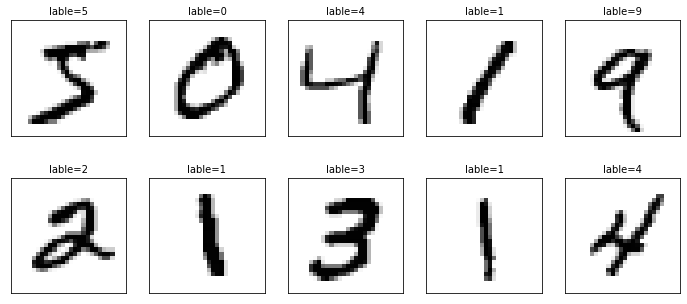

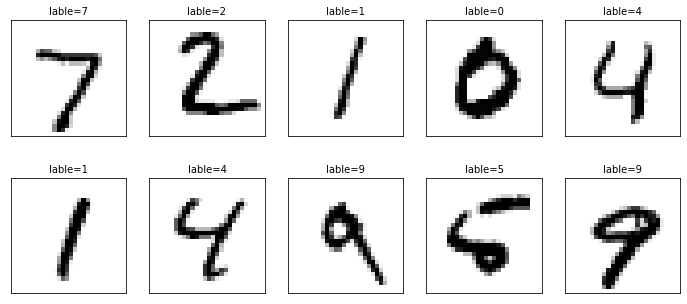

In [79]:

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()


y_train_label[0]


def plot_image_labels_prediction(image, lables, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(image[idx], cmap='binary')
        title = "lable=" + str(lables[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])
        idx += 1
    plt.show()


plot_image_labels_prediction(x_train_image, y_train_label, [], 0, 10)
plot_image_labels_prediction(x_test_image, y_test_label, [], 0, 10)


x_Train = x_train_image.reshape(-1, 28, 28, 1).astype('float32')  
x_Test = x_test_image.reshape(-1, 28, 28, 1).astype('float32')

x_Train_normalize = x_Train / 255  
x_Test_normalize = x_Test / 255

y_Train_OneHot = np_utils.to_categorical(y_train_label)  
y_Test_OneHot = np_utils.to_categorical(y_test_label)


In [81]:

# 2.建立模型

model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters= 32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(4,4)))
model.add(Dropout(0.5))  
model.add(Conv2D(filters= 64, kernel_size=(2,2), padding='Same', activation='relu'))
model.add(Conv2D(filters= 64, kernel_size=(2,2), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))   
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))    
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))    
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))  

print(model.summary())

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.0845 - accuracy: 0.9759 - val_loss: 0.0408 - val_accuracy: 0.9888
Epoch 2/10
 - 5s - loss: 0.0798 - accuracy: 0.9778 - val_loss: 0.0358 - val_accuracy: 0.9908
Epoch 3/10
 - 5s - loss: 0.0778 - accuracy: 0.9778 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 4/10
 - 5s - loss: 0.0728 - accuracy: 0.9794 - val_loss: 0.0344 - val_accuracy: 0.9907
Epoch 5/10
 - 5s - loss: 0.0673 - accuracy: 0.9802 - val_loss: 0.0353 - val_accuracy: 0.9913
Epoch 6/10
 - 5s - loss: 0.0686 - accuracy: 0.9802 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 7/10
 - 5s - loss: 0.0669 - accuracy: 0.9810 - val_loss: 0.0324 - val_accuracy: 0.9910
Epoch 8/10
 - 5s - loss: 0.0673 - accuracy: 0.9810 - val_loss: 0.0295 - val_accuracy: 0.9918
Epoch 9/10
 - 5s - loss: 0.0617 - accuracy: 0.9823 - val_loss: 0.0315 - val_accuracy: 0.9918
Epoch 10/10
 - 5s - loss: 0.0589 - accuracy: 0.9832 - val_loss: 0.0318 - val_accuracy: 0.9908


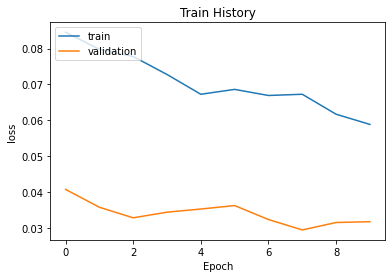

10000/10000 [==============================] - 2s 169us/step

accuracy 0.9929999709129333


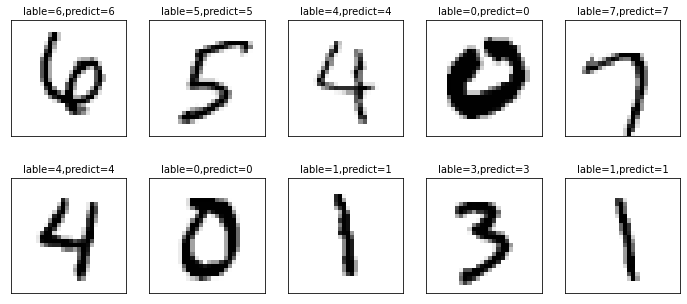

In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot, validation_split=0.2,
                          epochs=10, batch_size=128, verbose=2)


import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy') 
show_train_history(train_history, 'loss', 'val_loss') 

scores = model.evaluate(x_Test_normalize, y_Test_OneHot) 
print()
print('accuracy', scores[1])

prediction = model.predict_classes(x_Test)
prediction
plot_image_labels_prediction(x_test_image, y_test_label, prediction, idx=22)
